In [1]:
import pandas as pd
df_sucio = pd.read_csv('totales_sin_limpiar.csv').drop_duplicates()
print(df_sucio.info())
df_sucio.head()

falsas = df_sucio[df_sucio.Target == 1].reset_index(drop=True)
verdaderas = df_sucio[df_sucio.Target == 0].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Periódico          6614 non-null   object
 1   Hipervínculo       6614 non-null   object
 2   Fecha publicación  6607 non-null   object
 3   Titular            6614 non-null   object
 4   Subtítulo          5422 non-null   object
 5   Cuerpo             6614 non-null   object
 6   Categoría          4983 non-null   object
 7   Target             6614 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 465.0+ KB
None


In [2]:
df_sucio[df_sucio.Cuerpo == 'NaN']
# no hay NaNs escritos como strings

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target


In [3]:
import numpy as np

In [4]:
# sacamos el final de un par de noticias al azar de cada periodico y repetimos varias veces
# experimentamos con los datos para ver si hay algún patron muy claro en los finales que debamos eliminar

for p in ['ElDiario.es', 'ElMundo', 'El País']:
    
    i1 = np.random.randint(len(verdaderas[verdaderas.Periódico == p]))
    i2 = np.random.randint(len(verdaderas[verdaderas.Periódico == p]))
    
    print(verdaderas[verdaderas.Periódico == p].Cuerpo.iloc[i1][-700:], '\n')
    print(verdaderas[verdaderas.Periódico == p].Cuerpo.iloc[i2][-700:], '\n')

su indignación con lo único que importa. El precio de los alimentos, de los alquileres y de las hipotecas. La asfixia de la clase trabajadora. Los trabajadores empobrecidos también comentan lo poco que favorece el contraplano a la cabeza de Feijóo.“Ya solo puedo comprar pescado congelado y a mis hijos los mando al comedor para que tengan una dieta equilibrada. A mí me encanta el salmón, pero es que no puedo”, dice mientras señala un pincho con una loncha de ese pescado sobre lo que parece una ensaladilla y una rebanada de pan tostado. “Con lo que costó la boda de Tamara sí que tuvimos debate aquí”, cuenta la “mami”, que hace la cuenta de cuatro pinchos, dos verdejos y dos botellines de agua. 

sa un tiempo empieza a darte esa nostalgia”, relata. “El rock también salió de reinterpretar el blues”, enfatiza.Preguntado por si se engloba en un estilo musical, es honesto: “Si uso los ritmos del trap, sus bajos característicos y una voz con sus retoques, no pasa nada por decir que hago esa mú

In [5]:
el_pais = verdaderas[verdaderas.Periódico == 'El País'].reset_index(drop = True)

In [6]:
indices1 = el_pais.Cuerpo.str.find('suscríbete')
indices2 = el_pais.Cuerpo.str.find('suscríbase')

print(indices2.unique())
# parece que no aparece el "suscríbase"... pensaba que si

[-1]


In [7]:
minimos = np.minimum(indices1, indices2)
maximos = np.maximum(indices1, indices2)

indices = pd.Series(np.where((indices1 != -1) & (indices2 != -1), minimos, np.where((indices1 == -1) | (indices2 == -1), maximos, -1)))

In [8]:
# lista de indices con el menor indice de "indices1" e "indices2", para que si coinciden ambas palabras en una noticia (cosa que no sucede, pero bueno), se elimine desde la primera

In [9]:
indices

0         -1
1         -1
2       6158
3         -1
4         -1
        ... 
1943    6661
1944    7472
1945      -1
1946    5917
1947      -1
Length: 1948, dtype: int64

In [10]:
len(el_pais.Cuerpo.iloc[1946])

5949

In [11]:
el_pais['Cuerpo'] = el_pais.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

# el 'apply' es a todo el dataframe "el_pais", luego especificamos axis = 1 para se aplique por filas
# en cada fila, se accede a la columna 'Cuerpo' y se hace slicing hasta el valor de la serie de indices que corresponde a esa fila

In [12]:
len(el_pais.Cuerpo.iloc[1946])
# acorta en las que sale el "suscribete"

5917

In [13]:
el_diario = verdaderas[verdaderas.Periódico == 'ElDiario.es'].reset_index(drop = True)
indices = el_diario.Cuerpo.str.find('-----')
indices.unique()
# parece que hay 6 noticias donde aparecen los guiones

array([  -1, 4175, 5125, 9377, 7980, 7886, 3816], dtype=int64)

In [14]:
len(el_diario.Cuerpo.iloc[3])

4768

In [15]:
el_diario['Cuerpo'] = el_diario.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

In [16]:
len(el_diario.Cuerpo.iloc[3])

4175

In [17]:
verdaderas_limpio = pd.concat([el_diario, verdaderas[verdaderas.Periódico == 'ElMundo'], el_pais]).reset_index(drop = True)

# Cuerpo de las noticias sin valores faltantes, habiendo eliminado las principales frases incómodas que aparecían al final. Sin duplicados.

In [18]:
# .to_csv('totales_limpias.csv', index = False)

In [19]:
for p in ['El Mundo Today', 'HayNoticia.es']:
    
    i1 = np.random.randint(len(falsas[falsas.Periódico == p]))
    i2 = np.random.randint(len(falsas[falsas.Periódico == p]))
    
    print(falsas[falsas.Periódico == p].Cuerpo.iloc[i1][-700:], '\n')
    print(falsas[falsas.Periódico == p].Cuerpo.iloc[i2][-700:], '\n')
    
# no veo ningun patron en las ultimas lineas de las noticias
# solo algunas noticias muy cortas, de unos 200 caracteres que voy a eliminar a continuacion

n de 32 años. viendo que su iniciativa gozaba de cierta aceptación, el romántico también ha decidido hacer un agujero muy pequeño para poder introducir rosas por él. ahora estoy trabajando en un agujero intermedio en el que poder introducir el brazo para poder defecar agarrado de la mano de la persona que se encuentra al otro lado , asegura. la idea es que nadie vuelva a sentir que no tiene apoyo a la hora de hacer caca , profundiza. los responsables de numerosos servicios públicos alemanes ya valoran la posibilidad de eliminar todas las paredes para que las personas que los utilicen puedan practicar sexo tranquilamente sin tener que preocuparse por meter partes de su cuerpo en los agujeros. 

más de dos minutos , alertan los médicos. alfonso, que en estos momentos se encuentra muy relajado, se ha defendido asegurando que el bulto que se encontró se iba haciendo cada vez más grande durante la autoexploración y que no podía dejarlo así. cáncer no sé si tenía, pero vamos, se me marcaban 

# Análisis de la longitud de las noticias (Cuerpo)

In [20]:
v, f = verdaderas.Cuerpo.str.len().mean(), falsas.Cuerpo.str.len().mean()
print(f'longitud media verdaderas: {v} \nlongitud media falsas: {f} \nratio v/f: {v/f}')

longitud media verdaderas: 6335.020735620835 
longitud media falsas: 1518.5793991416308 
ratio v/f: 4.171675672145739


In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

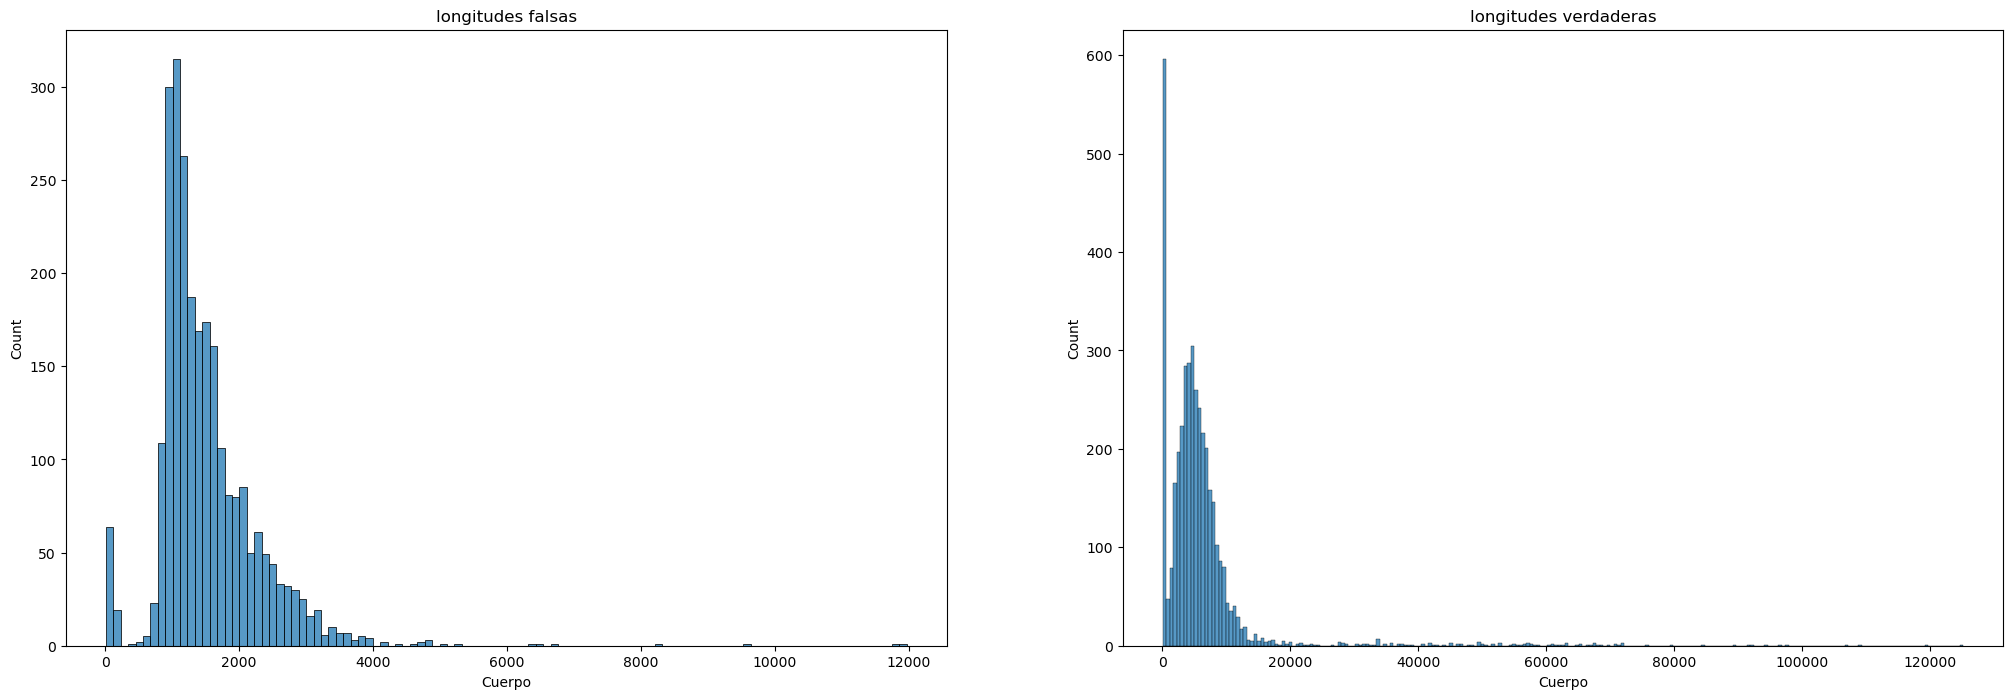

In [22]:
long_v = verdaderas.Cuerpo.str.len()
long_f = falsas.Cuerpo.str.len()

figure, axis = plt.subplots(1, 2, figsize=(25, 8))

sns.histplot(long_f, ax = axis[0])
axis[0].set_title('longitudes falsas')

sns.histplot(long_v, ax = axis[1])
axis[1].set_title('longitudes verdaderas')

plt.show()

In [23]:
print('Algunos datos sobre longitudes de Falsas y Verdaderas \n')
print('Por encima de los 4000 caracteres: ', (long_f[long_f > 4000].count(), long_v[long_v < 4000].count()))
print('En proporciones: ', (21/len(long_f), 2479/len(long_v)))
print('Coeficientes de variación: ', (long_f.std()/long_f.mean() , long_v.std()/long_v.mean()))

Algunos datos sobre longitudes de Falsas y Verdaderas 

Por encima de los 4000 caracteres:  (18, 1629)
En proporciones:  (0.008193523214982443, 0.6119476672426561)
Coeficientes de variación:  (0.5199134145880905, 1.505305876682012)


### Aunque no se aprecie tanto en los histogramas, la distribución de las longitudes de las noticias verdaderas presenta mucha mayor asimetría y dispersión.
#### 60% de las verdaderas por encima de los 4000 caracteres, mientras que ni el 1% de las falsas lo hacen
#### También se observa mucha mayor dispersión en las longitudes de las verdaderas

### Eliminando noticias por encima de cierto valor:
#### - Cantidades más similares de un tipo y otro
#### - Longitudes medias mas parecidas
#### - Menor asimetría en la distribución de las longitudes de las verdaderas
#### - Menor diferencia en la dispersion de ambas longitudes

In [24]:
totales = pd.concat([verdaderas_limpio, falsas]).reset_index(drop = True)

In [25]:
descartadas = totales[((totales.Cuerpo.str.len() < 200) == True) | ((totales.Cuerpo.str.len() > 6000) == True)]

In [26]:
totales_limpio = totales.drop(descartadas.index).reset_index(drop=True)
print(len(totales_limpio[totales_limpio.Target == 0]))
print(len(totales_limpio[totales_limpio.Target == 1]))

2615
2473


## Repito el analisis tras la limpieza

In [27]:
verdaderas = totales_limpio[totales_limpio.Target == 0]
falsas = totales_limpio[totales_limpio.Target == 1]

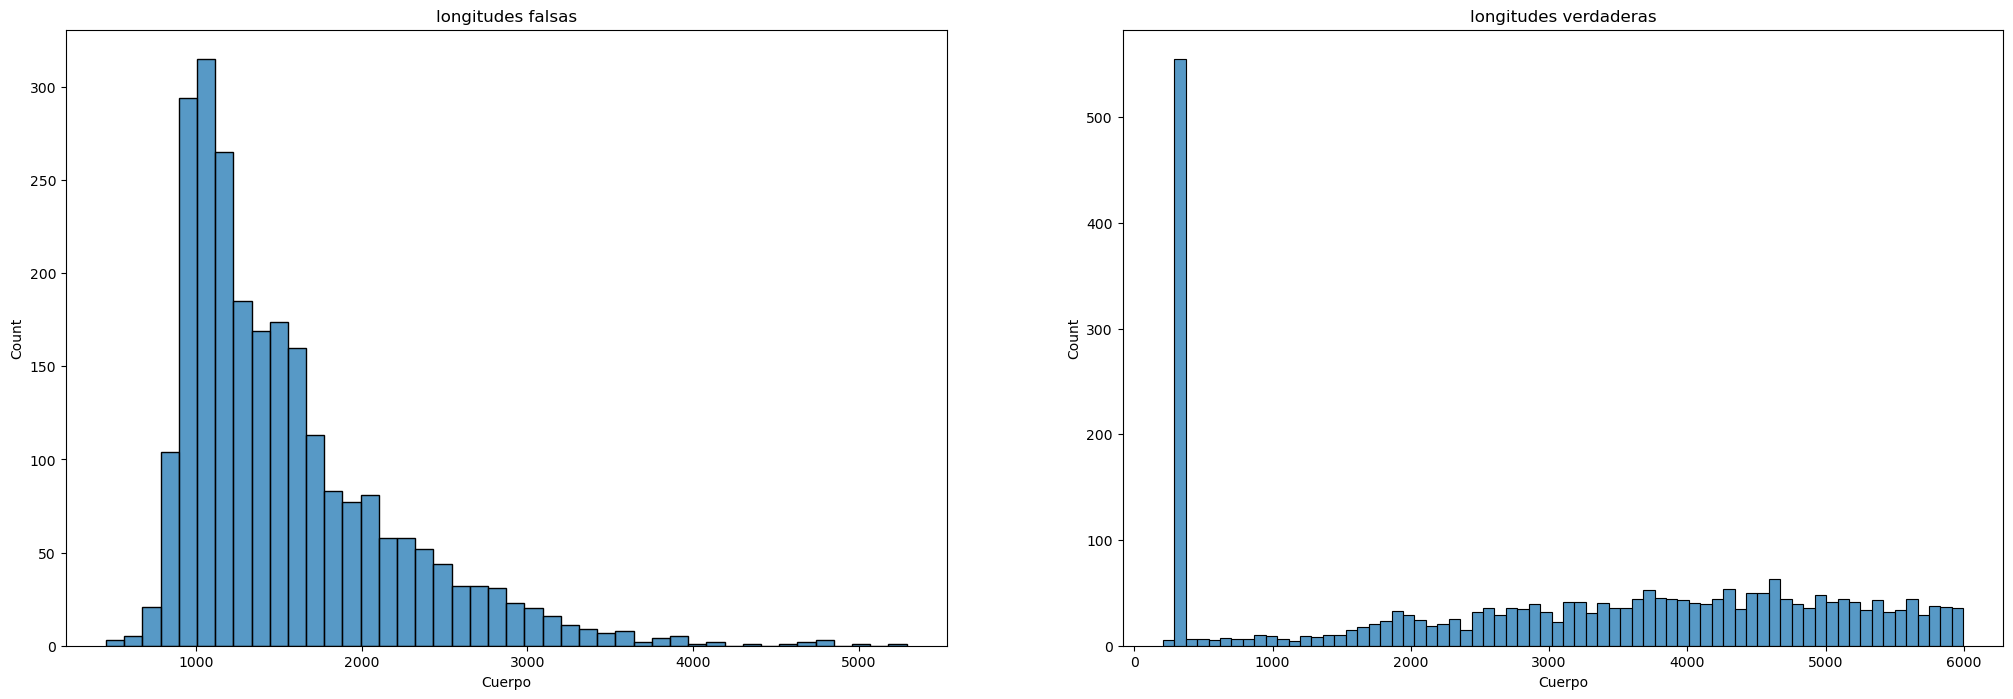

In [28]:
long_v = verdaderas.Cuerpo.str.len()
long_f = falsas.Cuerpo.str.len()

figure, axis = plt.subplots(1, 2, figsize=(25, 8))

sns.histplot(long_f, ax = axis[0])
axis[0].set_title('longitudes falsas')

sns.histplot(long_v, ax = axis[1], bins = 70)
axis[1].set_title('longitudes verdaderas')

plt.show()

# se observa algo raro en las noticias verdaderas de una longitud aproximada de 400
# tantas con una longitud tan concreta indica que probablemente formen algun tipo de grupo con características comunes

In [29]:
# VEAMOS DE FORMA ALEATORIA UNAS CUANTAS

cortas = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].reset_index(drop = True)
# falsas[falsas.Periódico == p].Cuerpo.iloc[i1][-700:]

i = np.random.randint(len(cortas))
print(len(cortas.Cuerpo.iloc[i]))
cortas.Cuerpo.iloc[i]

362


'España tiene 25 campeones olímpicos individuales. De ellos, sólo seis en los tres deportes reyes de los Juegos (atletismo, gimnasia artística y natación). Ahí, en ese panteón junto a Fermín Cacho, Daniel Plaza, Gervasio Deferr, Martín López Zubero y Hazte Premium desde 1€ el primer mes Aprovecha esta oferta por tiempo limitado y accede a todo el contenido web\n'

In [30]:
# en la mayoría se repite al final el mensaje "Hazte Premium desde 1€ el primer mes Aprovecha esta oferta por tiempo limitado y accede a todo el contenido web\n"
# habia pensado eliminarlas directamete pero son mas de 560, me parecen muchas

In [31]:
indices = cortas.Cuerpo.str.find('Hazte Premium')

print(f'Aparece en {(indices != -1).sum()} noticias de las {len(cortas)} que estamos analizando')

Aparece en 553 noticias de las 569 que estamos analizando


In [32]:
indices
# es raro que el "Hazte Premium..." empiece tantas veces en el mismo punto

0      250
1      250
2      250
3      250
4      250
      ... 
564    250
565    250
566     -1
567     -1
568     -1
Name: Cuerpo, Length: 569, dtype: int64

In [33]:
cortas.Cuerpo[:7]
# Sin embargo sí parecen distintas

0    Estos días se cumple un año desde que Araceli ...
1    Hace algo más de 14 años que el Ibex 35 conqui...
2    Hoy reposan en las calles como un elemento más...
3    Cuando Ismael Clemente empezó a frecuentar los...
4    La continuidad del Instituto Nacional Electora...
5    Al final no fue para tanto, sino todo un éxito...
6    Cuando a principios del siglo pasado la nueva ...
Name: Cuerpo, dtype: object

In [34]:
print(len(cortas.Cuerpo.iloc[0]))

cortas['Cuerpo'] = cortas.apply(lambda fila: fila['Cuerpo'][:indices[fila.name]], axis = 1)

print(len(cortas.Cuerpo.iloc[0]))

362
250


In [35]:
indices_cortas = verdaderas[(verdaderas.Cuerpo.str.len() < 500) == True].index
verdaderas = pd.concat([verdaderas.drop(indices_cortas).reset_index(drop = True), cortas]).reset_index(drop = True)

#  ya limpio del todo

In [36]:
totales_limpisimo = pd.concat([verdaderas, falsas]).reset_index(drop = True)

In [37]:
totales_limpisimo.loc[:, 'Cuerpo'] = totales_limpisimo.Cuerpo.str.lower()
totales_limpisimo.loc[:, 'Subtítulo'] = totales_limpisimo.Subtítulo.str.lower()
totales_limpisimo.loc[:, 'Titular'] = totales_limpisimo.Titular.str.lower()

In [38]:
totales_limpisimo.to_csv('dataset_final.csv', index = False)

In [39]:
totales_limpisimo

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,el pp se recupera ligeramente pero sigue sin o...,la estimación de escaños no se mueve en la enc...,el partido popular se recupera muy ligeramente...,politica,0
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,un 58% de los ciudadanos critican los pactos c...,"el 17,8% de quienes apuestan por feijóo ven “m...",el pp ha necesitado a vox para recuperar buena...,politica,0
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,un diputado de ayuso reúne a un grupo de vícti...,daniel portero trata con urgencia de contrarre...,el diputado del pp en la asamblea de madrid da...,politica,0
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,el psoe de mójacar recurre ante el constitucio...,"ya con nuevo alcalde del pp, los socialistas r...",mojácar retomó el ritmo político con la procla...,andalucia,0
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,la exalcaldesa de toledo pide a feijóo que fir...,"la socialista, también número dos al congreso,...",la exalcaldesa de toledo y 'número dos' de la ...,castilla-la-mancha,0
...,...,...,...,...,...,...,...,...
5083,HayNoticia.es,https://haynoticia.es/una-empresa-catalana-tri...,2018-11-06,una empresa catalana triunfa con su papel higi...,NaN,la empresa catalana banys nous de barcelona es...,curiosidades,1
5084,HayNoticia.es,https://haynoticia.es/hospitalizado-tras-inten...,2018-10-31,hospitalizado tras intentar sacarse una muela ...,NaN,sucedió el pasado lunes poco después de las 20...,curiosidades,1
5085,HayNoticia.es,https://haynoticia.es/lleva-300-bolsas-de-plas...,2018-10-30,lleva 300 bolsas de plástico a mercadona para ...,NaN,un joven ha sido noticia ayer tras presentarse...,curiosidades,1
5086,HayNoticia.es,https://haynoticia.es/la-dgt-multara-a-los-con...,2018-10-28,la dgt multará a los conductores que no hayan ...,NaN,este domingo nos ha tocado hacer por segunda v...,curiosidades,1


# Análisis de palabras más frecuentes

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

f_cuerpos = falsas.Cuerpo.values
vectorizer1 = CountVectorizer()
vectorizer1.fit(f_cuerpos)

CountVectorizer()

In [41]:
v_cuerpos = verdaderas.Cuerpo.values
vectorizer2 = CountVectorizer()
vectorizer2.fit(v_cuerpos)

CountVectorizer()

In [42]:
f_vect = vectorizer1.transform(f_cuerpos)
v_vect = vectorizer2.transform(v_cuerpos)

frecuencias_fal = f_vect.sum(axis=0)
frecuencias_ver = v_vect.sum(axis=0)

In [43]:
palabras1 = vectorizer1.get_feature_names_out()
palabras2 = vectorizer2.get_feature_names_out()

ind1 = frecuencias_fal.argsort()[::-1].tolist()[0]
ind2 = frecuencias_ver.argsort()[::-1].tolist()[0]

mas_frec_fal = []
for i in ind1[:10]:
    mas_frec_fal.append(palabras1[i])

mas_frec_ver = []
for i in ind2[:10]:
    mas_frec_ver.append(palabras2[i])


mas_frec_fal

['любопытство',
 'movamos',
 'movemos',
 'donner',
 'donetsk',
 'dones',
 'moverlo',
 'ultras',
 'doncellas',
 'donativos']

In [44]:
from collections import Counter
from nltk.corpus import stopwords

stopwords = stopwords.words('spanish')

f_cuerpos = falsas.Cuerpo.values
vectorizer1 = CountVectorizer(stop_words = stopwords + ['si', 'según', 'tras'])
vectorizer1.fit(f_cuerpos)
f_vect = vectorizer1.transform(f_cuerpos)
palabras1 = vectorizer1.get_feature_names_out()

In [45]:
frecuencias_fal = f_vect.sum(axis=0)
frecuencias_fal = np.asarray(frecuencias_fal).ravel()

contador_fal = Counter(dict(zip(palabras1, frecuencias_fal)))

# Filtrar stopwords y palabras de longitud 1
mas_frec_fal = [(palabra, frecuencia) for palabra, frecuencia in contador_fal.most_common(10) if palabra not in stopwords and len(palabra) > 1]

In [46]:
frecuencias_fal = [frecuencia for _, frecuencia in mas_frec_fal]
palabras_fal = [palabra for palabra, _ in mas_frec_fal]

In [47]:
print(palabras_fal) 
print(frecuencias_fal)

['años', 'ser', 'ahora', 'así', 'sido', 'mañana', 'vez', 'dos', 'aunque', 'casa']
[1138, 1084, 937, 876, 824, 777, 765, 760, 721, 716]


In [48]:
# ahora vemos las frecuencias de las verdaderas:

In [49]:
v_cuerpos = verdaderas.Cuerpo.values
vectorizer2 = CountVectorizer(stop_words = stopwords + ['si', 'según', 'tras'])
vectorizer2.fit(v_cuerpos)
v_vect = vectorizer2.transform(v_cuerpos)
palabras2 = vectorizer2.get_feature_names_out()

In [50]:
frecuencias_ver = v_vect.sum(axis=0)
frecuencias_ver = np.asarray(frecuencias_ver).ravel()

contador_ver = Counter(dict(zip(palabras2, frecuencias_ver)))

# Filtrar stopwords y palabras de longitud 1
mas_frec_ver = [(palabra, frecuencia) for palabra, frecuencia in contador_ver.most_common(10) if palabra not in stopwords and len(palabra) > 1]

In [51]:
frecuencias_ver = [frecuencia for _, frecuencia in mas_frec_ver]
palabras_ver = [palabra for palabra, _ in mas_frec_ver]

In [52]:
print(palabras_ver) 
print(frecuencias_ver)

['años', 'dos', 'ser', 'país', 'año', 'después', 'ahora', 'parte', 'madrid', 'sido']
[3017, 2433, 1685, 1571, 1566, 1468, 1453, 1425, 1358, 1343]


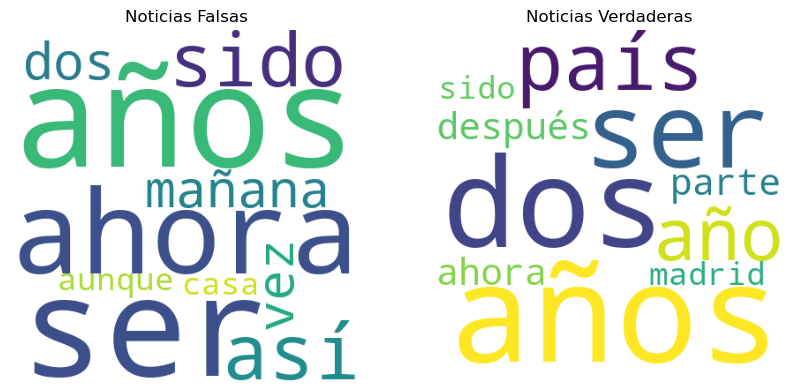

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_fal = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(zip(palabras_fal, frecuencias_fal)))
wordcloud_ver = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(zip(palabras_ver, frecuencias_ver)))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(wordcloud_fal)
axes[0].set_title('Noticias Falsas')
axes[0].axis('off')

axes[1].imshow(wordcloud_ver)
axes[1].set_title('Noticias Verdaderas')
axes[1].axis('off')

plt.show()